# "Lesson 2: Backtest your trading strategy with only 3 lines of code"
> "Learn how to assess the performance of an SMAC strategy on JFC"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Lorenzo Ampil
- categories: [strategies, lesson]

In [8]:
#!pip install fastquant


/Users/enzoampil/quant/fastquant


# fastquant Lesson 2 - Backtest your trading strategy with only 3 lines of code

# fastquant package Updates

1. `get_stock_data` has been added, which now includes all Yahoo Finance data (on top of PSE)
2. `backtest` function is now ready to use!
3. README has been updated to reflect the above

# Setup
1. Google Colab (limitted plotting)
2. Jupyter notebook (complete plotting)

## Google Colab Lesson 2 link

Colab notebook on this [link](https://colab.research.google.com/drive/1FxxY5kDdpgKFkGd7Br6PClu3uC-JWuPH)

## How to use Jupyter notebooks
#### 1. Go to your terminal and install jupyter

`pip3 install jupyter`

#### 2. Clone fastquant

`git clone https://github.com/enzoampil/fastquant.git`

`cd fastquant`

#### 3. Run jupyter

`jupyter notebook`
#### 4. Open lesson at `lessons/fastquant_lesson2_backtest_your_trading_strategy.ipynb`


# Recap from Lesson 1

## Plot Closing Stock Prices


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Daily Closing Prices of SPY\nfrom 2018-01-01 to 2021-07-01')

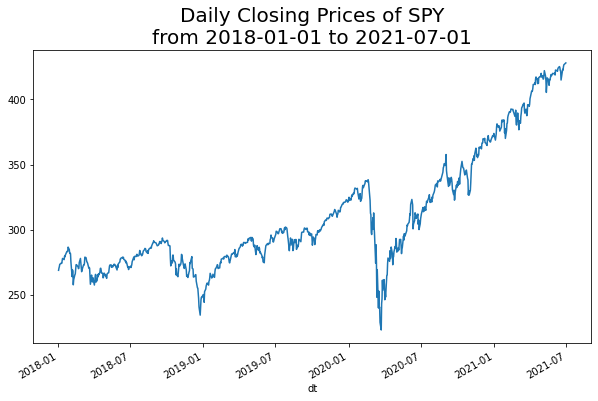

In [3]:
from matplotlib import pyplot as plt
from fastquant import backtest, get_stock_data

%matplotlib inline
jfc = get_stock_data("SPY", "2018-01-01", "2021-07-01")
jfc.close.plot(figsize=(10, 6))
plt.title("Daily Closing Prices of SPY\nfrom 2018-01-01 to 2021-07-01", fontsize=20)

## Analyze with a simple moving average (SMA) trading strategy

In this section, we will attempt to visually assess the performance of a SMA crossover strategy. There are many ways to do this strategy, but we will go with a “price crossover” approach with a 30 day SMA.

In this case, it’s considered a “buy” signal when the closing price crosses the simple moving average from below, and considered a “sell” signal when the closing price crosses the simple moving average from above.

So how do we know our SMA price crossover strategy is effective? Visually, we can assess this by seeing if the “sell” signal happens right before the stock price starts going down, and if the “buy” signal happens right before the stock price starts going up.

Text(0.5, 1.0, 'Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01')

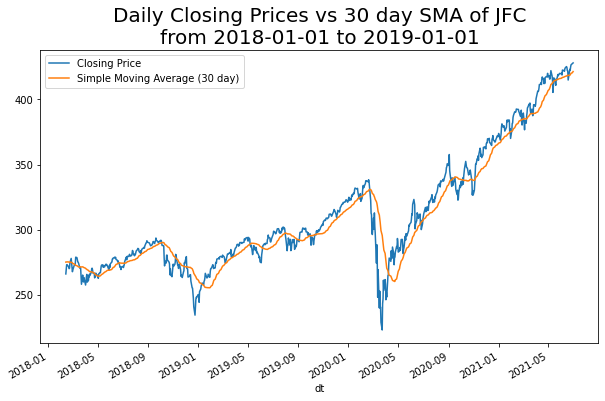

In [4]:
import pandas as pd

ma30 = jfc.close.rolling(30).mean()
close_ma30 = pd.concat([jfc.close, ma30], axis=1).dropna()
close_ma30.columns = ['Closing Price', 'Simple Moving Average (30 day)']

close_ma30.plot(figsize=(10, 6))
plt.title("Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

# Lesson 2: Backtesting with fastquant

## Backtest your trading strategy in 3 lines of code

Now, let's get started with backtesting!

Below, I show how you can use `fastquant` to backtest a simple moving average crossover (similar to what we have above).

The three steps are:
1. Import the `backtest` and `get_pse_data` functions from `fastquant`

In [5]:
from fastquant import backtest, get_stock_data

2. Get stock data in a date, close, volume format (DCV)

Here, we get DCV (date, closing, volume) data from JFC using the `get_pse_data` function

In [6]:
jfc = get_stock_data("SPY", "2018-01-01", "2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [7]:
jfc

,open,high,low,close,volume
dt,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,57319200
...,...,...,...,...,...
2018-12-24,239.039993,240.839996,234.270004,234.339996,147311600
2018-12-26,235.970001,246.179993,233.759995,246.179993,218485400
2018-12-27,242.570007,248.289993,238.960007,248.070007,186267300


3. Backtest a simple moving average crossover (`smac`) strategy on the JFC data

We perform the backtest using a 15 day moving average as the "fast" moving average, and a 35 day moving average as the "slow" moving average. If we want to change these parameter values, we can just replace the numbers in the `backtest` function.

We call these the *strategy level arguments* since they are unique to a specific strategy.

Do note that by default, the backtesting algorithm assumes that you start out with PHP 100,000 as cash (`init_cash`), while using all of that cash during a buy signal (`buy_prop`), and selling all of your current stock holdings during a sell signal (`sell_prop`). We call these the *global level arguments* since they can be shared across companies.

In [8]:
%matplotlib
backtest('smac', jfc, fast_period=15, slow_period=35)

Using matplotlib backend: agg
Starting Portfolio Value: 100000.00
2018-12-31, ===Global level arguments===
2018-12-31, init_cash : 100000
2018-12-31, buy_prop : 1
2018-12-31, sell_prop : 1
2018-12-31, commission : 0
2018-12-31, stop_loss : 0
2018-12-31, stop_trail : 0
2018-12-31, take_profit : 0
===Strategy level arguments===
fast_period : 15
slow_period : 35
2018-12-31, Final Portfolio Value: 94659.68084716797
2018-12-31, Final PnL: -5340.32
Time used (seconds): 0.14883899688720703
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast_period:15	slow_period:35
Returns	rtot:-0.05488203308584042	ravg:-0.000218653518270

KeyError: 

## Customize strategy parameters

The idea of backtesting is that we should choose the **best** strategy based on which one has worked best over time.

In [9]:
%matplotlib
backtest('smac', jfc, fast_period=1, slow_period=30)

Using matplotlib backend: agg
Starting Portfolio Value: 100000.00
2018-12-31, ===Global level arguments===
2018-12-31, init_cash : 100000
2018-12-31, buy_prop : 1
2018-12-31, sell_prop : 1
2018-12-31, commission : 0
2018-12-31, stop_loss : 0
2018-12-31, stop_trail : 0
2018-12-31, take_profit : 0
===Strategy level arguments===
fast_period : 1
slow_period : 30
2018-12-31, Final Portfolio Value: 95450.7060546875
2018-12-31, Final PnL: -4549.29
Time used (seconds): 0.1774587631225586
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast_period:1	slow_period:30
Returns	rtot:-0.04656023872805686	ravg:-0.0001854989590759237

KeyError: 

In [10]:
%matplotlib
backtest('smac', jfc, fast_period=30, slow_period=50)

Using matplotlib backend: agg
Starting Portfolio Value: 100000.00
2018-12-31, ===Global level arguments===
2018-12-31, init_cash : 100000
2018-12-31, buy_prop : 1
2018-12-31, sell_prop : 1
2018-12-31, commission : 0
2018-12-31, stop_loss : 0
2018-12-31, stop_trail : 0
2018-12-31, take_profit : 0
===Strategy level arguments===
fast_period : 30
slow_period : 50
2018-12-31, Final Portfolio Value: 100598.60534667969
2018-12-31, Final PnL: 598.61
Time used (seconds): 0.1815183162689209
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast_period:30	slow_period:50
Returns	rtot:0.005968208228365619	ravg:2.377772202536103e-0

KeyError: 

 We can conclude that across all the parameter combinations we've tried, the best performing one is the one where `fast_period` = 15, while `slow_period` = 40.

Using matplotlib backend: MacOSX
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 40
2018-08-07, BUY CREATE, 270.00
2018-08-07, Cash: 100000.0
2018-08-07, Price: 270.0
2018-08-07, Buy prop size: 367
2018-08-07, Afforded size: 367
2018-08-07, Final size: 367
2018-08-08, BUY EXECUTED, Price: 270.00, Cost: 99090.00, Comm 743.17
2018-09-21, SELL CREATE, 271.00
2018-09-24, SELL EXECUTED, Price: 271.00, Cost: 99090.00, Comm 745.93
2018-09-24, OPERATION PROFIT, GROSS 367.00, NET -1122.10
2018-11-05, BUY CREATE, 280.00
2018-11-05, Cash: 98877.89749999999
2018-11-05, Price: 280.0
2018-11-05, Buy prop size: 350
2018-11-05, Afforded size: 350
2018-11-05, Final size: 350
2018-11-06, BUY EXECUTED, Price: 280.00, Cost: 98000.00, Comm 735.00
Final Portfolio Value: 102272.90


<IPython.core.display.Javascript object>


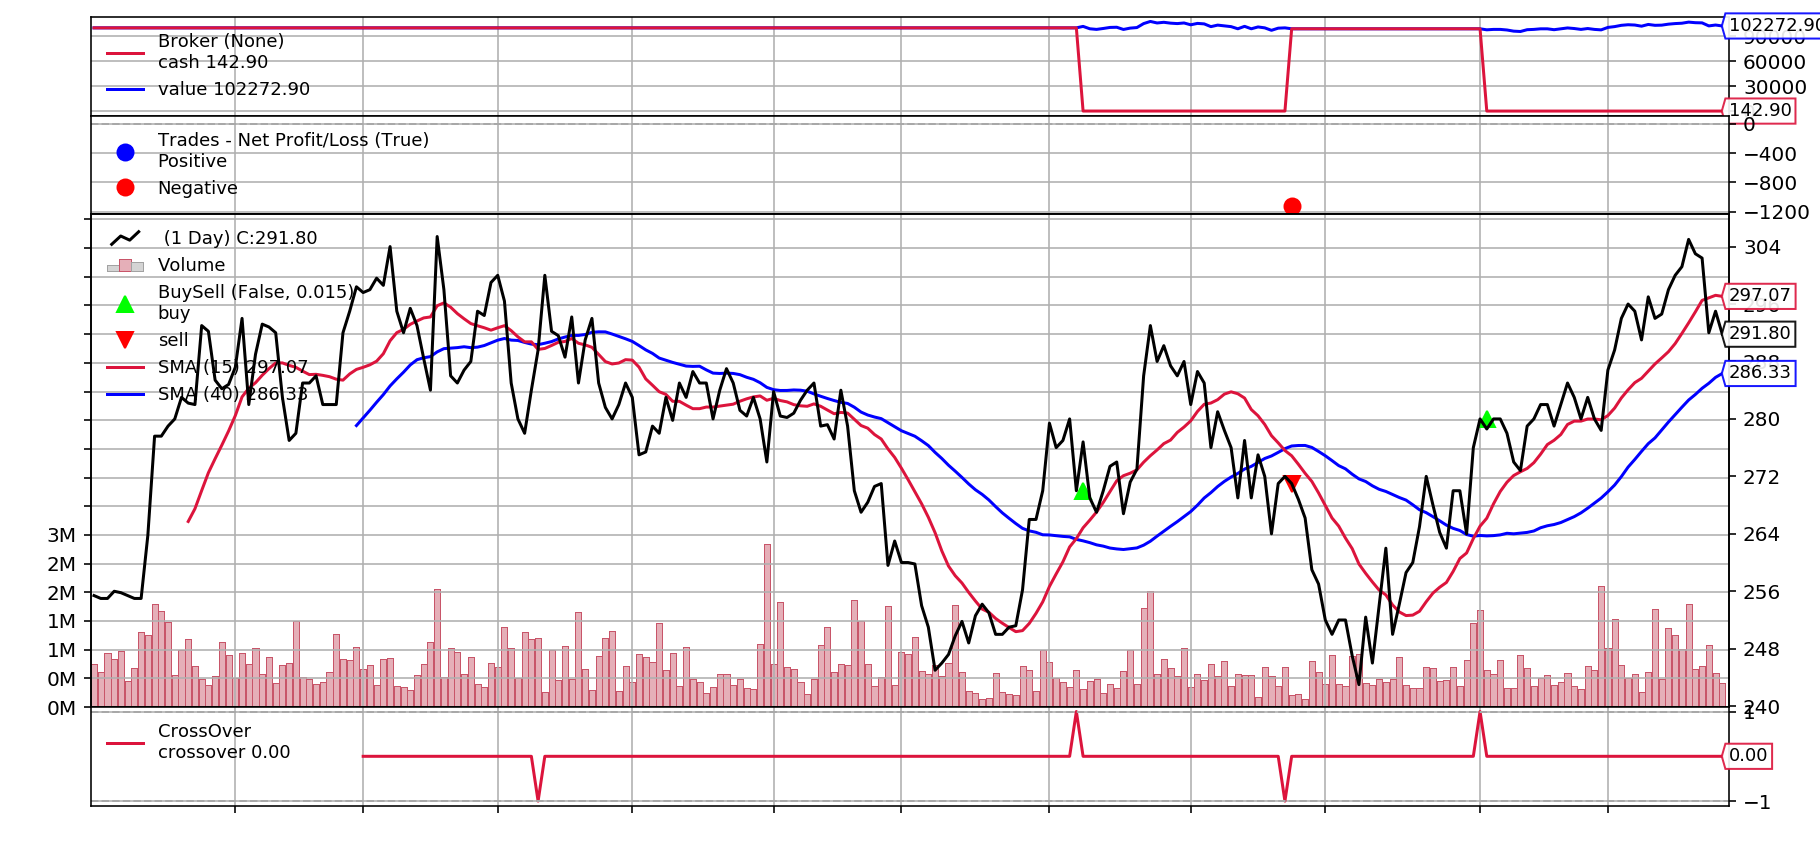

In [30]:
%matplotlib
backtest('smac', jfc, fast_period=15, slow_period=40)

## Relevant resources
1. Medium article
2. [Backtrader repo](https://github.com/mementum/backtrader)

## How to contribute more trading strategies

#### Checkout `fastquant/strategies.py`

1. New strategies can be added with as little as 20 lines of code (excluding docs)
2. Please let me know if you're intrested in contributing! :)
3. Happy to walk you through the process personally, still in the process of writing a tutorial

#### Planning to add the following TA strategies next:
1. SMAC [DONE]
2. RSI [DONE]
3. Bollinger Bands
4. Moving Average Convergence Divergence
5. EMAC (exponential moving average crossover)
6. On-Balance-Volume
7. Ichimoku Kinko Hyo
8. Average Directional Index
9. Parabolic Stop and Reverse (SAR)
10. Stochastic

#### For advanced DS peeps who want to go straight into ML based indicators, I also encourage you to contribute!

## Next webinar - Lecture 3: Relative Strength Index (Theory + backtesting)